# PDF Scraper of Bulletin   

In [104]:
#!pip install PyPDF2
# SOMMERSESSION 2016, 29. Mai - 16. Jun. 2016, 80 - 587

In [105]:
import PyPDF2
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
import dateutil.parser
import re
import time

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
datestring = time.strftime("%m-%h-%d")
datestring

'08-Aug-02'

# Getting all the pages

In [106]:
#Working with first 50 pages for a sample
pdfFileObj = open('Bulletin_Sommersession_NR_5004_1606.pdf', 'rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

get_page = 80
whole_Text = ''

for page in range(80, 587):  #0 26
    pageObj = pdfReader.getPage(get_page) 
    Page = pageObj.extractText()
    get_page += 1
    whole_Text = whole_Text + Page
    
type(whole_Text)

str

# Prepping the String

In [107]:
#Removing Zwischenrufe der Präsidentin
whole_Text = whole_Text.replace('(Zwischenruf', "") 
#Getting rid of \n, makes search through the document more difficult, because I can't use "." to find different characters
whole_Text = whole_Text.replace('\n', " ")
#Getting rid of '  -' spaces
whole_Text = whole_Text.replace('  -', " ")
#Getting rid of '  -' spaces
whole_Text = whole_Text.replace('-  ', " ")
#Getting rid of '- ' spaces
whole_Text = whole_Text.replace('- ', " ")
#Getting rid of ' -' spaces
whole_Text = whole_Text.replace(' -', " ")
#Formating –
whole_Text = whole_Text.replace('Œ', "–") 
#Headers and bottom of the page
#Bulletin officiel de l’Assemblée fédérale
whole_Text = whole_Text.replace('Bulletin officiel de l™Assemblée fédérale', " ")
#Bulletin officiel de l’Assemblée fédérale
whole_Text = whole_Text.replace('Amtliches Bulletin der Bundesversammlung', " ") 

In [108]:
# Still need to deal with irregular header, i.e.
# 30. Mai 2016719Nationalrat           14.094 
# 14.094           Conseil national72030 mai 2016
# 30. Mai 2016721Nationalrat           14.094
# 14.094           Conseil national72230 mai 2016   
#whole_Text = whole_Text.replace(r"[0-9]+\.[0-9].+Conseil national", "")

# Working on the Regular Expressions to extract the information

In [109]:
#Finding everthing in brackets, i.e. '(GL, AG)'
Partei_Kanton = re.findall(r"\([A-Z]+, [A-Z][A-Z]\)", whole_Text)
len(Partei_Kanton)

961

In [110]:
#Get name from before the pattern (XY, XY), using the negavitve outlook:
#http://stackoverflow.com/questions/31713623/search-in-a-string-and-obtain-the-2-words-before-and-after-the-match-in-python
Personen_name = re.findall(r'\w*\s*\w+\b\s+\b[-\w|\w]+(?=\s*\([A-Z]+, [A-Z][A-Z]\))', whole_Text)
len(Personen_name)

961

In [111]:
#Problem, I'm sure there is a way to grab botth the pattern (X+, XY) and the two words, 
#I can't figure out how though. But as these lists are teh same length, I think it works anyway.
#that come before. 

In [112]:
#Getting the whole text
Text = re.findall(r"[A-Z],\s+[A-Z][A-Z]\)(.*?)\(|Leuthard Doris|Sommaruga Simonetta|Schneider-Ammann Johann|Maurer Ueli|Burkhalter Didier|Berset Alain|Parmelin Guy", whole_Text)
#Removing empty lists
Text = list(filter(None, Text))
len(Text)

961

In [113]:
#for testing, because in the test the last text will never be included
#Partei_Kanton.pop()

In [114]:
#for testing, because in the test the last text will never be included
#Personen_name.pop()

In [115]:
#Starting Dictionary
Dict_List = []
Dict_Text = []
for Partei_Kanton, Name, Talk in zip(Partei_Kanton, Personen_name, Text):
        
        #Getting Partei
        Partei = re.search(r'[A-Z]+,', Partei_Kanton)
        Partei = Partei.group().replace(',', '')
    
        #Getting Kanton
        Kanton = re.search(r', [A-Z][A-Z]', Partei_Kanton)
        Kanton = Kanton.group().replace(', ', '')
        
        #Getting Name
        Name = Name.replace('  ', ' ').strip()
        Name = Name.replace('16 ', '')
        Name = re.sub(r'[0-9]*', '', Name).strip()
        
        #Sometimes the Regex grabs words is should, so I am filtering them out here. Not ideal though.
        Name = Name.replace('motion', '').replace('fédérale', '').replace('Etats', '').replace('postulat', '').replace('initiative', '').replace('Maintenir', '').replace('sports', '').replace('finances', '').replace('Biffer', '').strip()
        Name = Name.replace('matière ', '').replace('renvoi', '').replace('intérieur ', '').strip()
        
        #I still need to get rid of name at the end of each talk:
        #Talk
        
        #Getting lenght of talk
        Talk_len = len(Talk)
    
        Dict = {'Partei': Partei,
               'Kanton': Kanton,
               'Name': Name,
                'Reden_Länge': Talk_len
               }
        
        Text_Book = {'Partei': Partei,
               'Kanton': Kanton,
               'Name': Name,
                'Reden': Talk,
                'Reden_Länge': Talk_len
               }
        Dict_List.append(Dict)
        Dict_Text.append(Text_Book)
        
print(Dict_List)

[{'Partei': 'GL', 'Kanton': 'AG', 'Reden_Länge': 4985, 'Name': 'Flach Beat'}, {'Partei': 'S', 'Kanton': 'VD', 'Reden_Länge': 9137, 'Name': 'Ruiz Rebecca Ana'}, {'Partei': 'V', 'Kanton': 'GE', 'Reden_Länge': 6680, 'Name': 'Nidegger Yves'}, {'Partei': 'G', 'Kanton': 'BS', 'Reden_Länge': 4290, 'Name': 'Arslan Sibel'}, {'Partei': 'G', 'Kanton': 'GE', 'Reden_Länge': 5266, 'Name': 'Mazzone Lisa'}, {'Partei': 'GL', 'Kanton': 'BE', 'Reden_Länge': 3219, 'Name': 'Bertschy Kathrin'}, {'Partei': 'S', 'Kanton': 'GE', 'Reden_Länge': 4048, 'Name': 'Fehlmann Rielle Laurence'}, {'Partei': 'S', 'Kanton': 'BE', 'Reden_Länge': 3076, 'Name': 'Allemann Evi'}, {'Partei': 'V', 'Kanton': 'SZ', 'Reden_Länge': 4752, 'Name': 'Schwander Pirmin'}, {'Partei': 'RL', 'Kanton': 'NE', 'Reden_Länge': 6100, 'Name': 'Bauer Philippe'}, {'Partei': 'C', 'Kanton': 'OW', 'Reden_Länge': 5871, 'Name': 'Vogler Karl'}, {'Partei': 'BD', 'Kanton': 'AG', 'Reden_Länge': 9340, 'Name': 'Guhl Bernhard'}, {'Partei': 'V', 'Kanton': 'AR', 'R

# Working with the Dataframe

In [13]:
#Making the DataFrame for politicians & 
df = pd.DataFrame(Dict_List)

In [14]:
#Making DataFrame to look up texts
df_Text = pd.DataFrame(Dict_Text)

In [15]:
df.head()

,Kanton,Name,Partei,Reden_Länge
0,AG,Flach Beat,GL,4985
1,VD,Ruiz Rebecca Ana,S,9137
2,GE,Nidegger Yves,V,6680
3,BS,Arslan Sibel,G,4290
4,GE,Mazzone Lisa,G,5266


## The Total number of minutes speech time per party

In [16]:
#What is the average reading speed per minute. Slide presentations are around
#120 words per minute, but these are policy speakers, who speak faster. 
#we'll word with the average: 200 words per minute. https://en.wikipedia.org/wiki/Words_per_minute
#Average word length in German is 5 - 6. We'll work with 5.5.

df['Rede Minuten'] = df['Reden_Länge'] / 1100

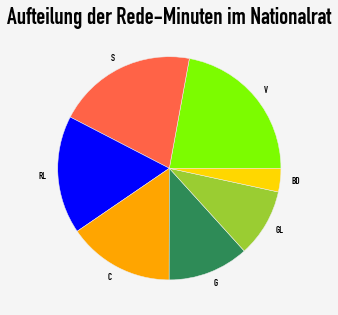

In [17]:
#Making the plot look nice:
#http://jonathansoma.com/lede/data-studio/classes/tufte/matplotlib-styles-data-ink-and-annotation/

# Making default font 
matplotlib.rcParams['font.sans-serif'] = "DIN Condensed"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "DIN Condensed"

fig, ax = plt.subplots(figsize =(5,5), facecolor='WhiteSmoke')

df_TOTAL_MINs = df.groupby('Partei')['Rede Minuten'].sum().sort_values(ascending=False).plot(kind='pie', colors=['LawnGreen', 'tomato', 'b', 'orange', 'SeaGreen', 'YellowGreen', 'Gold'], ax=ax)
ax.set_ylabel("")

#Setting title
ax.set_title("Aufteilung der Rede-Minuten im Nationalrat", fontname='DIN Condensed', fontsize=24)




In [18]:
#This looks as though it corresponds pretty well to the percentages of
#the various parties in parliament. Lets have a closer look though. What is the 
#Total number of minutes?

In [19]:
#creating dataframe
df_TOTAL_MINs = df.groupby('Partei')['Rede Minuten'].sum()
df_TOTAL_MINs = pd.DataFrame(df_TOTAL_MINs)
#Re-Indexing
df_TOTAL_MINs.reset_index(inplace=True)
#Creating Anteil
df_TOTAL_MINs['Anteil'] = df_TOTAL_MINs['Rede Minuten'] / df['Rede Minuten'].sum() * 100

In [20]:
#Comparing to atual size of the party. Franktionen here:
#https://www.parlament.ch/de/organe/fraktionen
#Check this against the speeches
df_NR_FRAKTIONEN = pd.read_csv("FRAKTIONEN_NR.csv")
df_TOTAL_MINs = df_TOTAL_MINs.merge(df_NR_FRAKTIONEN, left_on = 'Partei', right_on ='Partei') 
#Renaming the columns
df_TOTAL_MINs.columns = ['Partei', 'Rede Minuten', 'Anteil Reden', 'Anzahl Mitglieder', 'Anteil im Parlament']
#Working out the percentage gained or lost
df_TOTAL_MINs['Gewinn_Verlust'] = df_TOTAL_MINs['Anteil Reden'] - df_TOTAL_MINs['Anteil im Parlament']
#Working out the minutes gaines or lost
df_TOTAL_MINs['In Minuten'] = df_TOTAL_MINs['Gewinn_Verlust'] * (df['Rede Minuten'].sum() / 100)

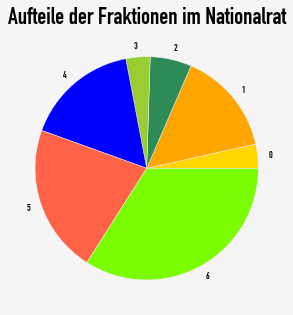

In [21]:
# Anteile im Parlament
# Making default font 
matplotlib.rcParams['font.sans-serif'] = "DIN Condensed"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "DIN Condensed"

fig, ax = plt.subplots(figsize =(5,5), facecolor='WhiteSmoke')

df_TOTAL_MINs['Anteil im Parlament'].plot(kind='pie', colors=['Gold', 'orange', 'SeaGreen', 'YellowGreen', 'b', 'tomato',  'LawnGreen'], ax=ax)
ax.set_ylabel("")

#Setting title
ax.set_title("Aufteile der Fraktionen im Nationalrat", fontname='DIN Condensed', fontsize=24)

In [22]:
df_TOTAL_MINs

,Partei,Rede Minuten,Anteil Reden,Anzahl Mitglieder,Anteil im Parlament,Gewinn_Verlust,In Minuten
0,BD,75.280909,3.403793,7,3.5,-0.096207,-2.127795
1,C,341.345455,15.433782,30,15.0,0.433782,9.593864
2,G,259.640000,11.739507,12,6.0,5.739507,126.939364
3,GL,218.487273,9.878804,7,3.5,6.378804,141.078568
4,RL,379.080909,17.139974,33,16.5,0.639974,14.154159
5,S,448.513636,20.279344,43,21.5,-1.220656,-26.996977
6,V,489.329091,22.124796,68,34.0,-11.875204,-262.641182


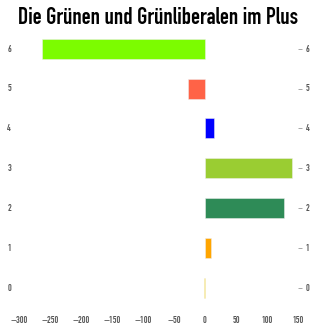

In [96]:
#Gewinner und Verlierer 

fig, ax = plt.subplots(figsize =(5,5), facecolor='White')

df_TOTAL_MINs['In Minuten'].plot(kind='barh', color=['Gold', 'orange', 'SeaGreen', 'YellowGreen', 'b', 'tomato',  'LawnGreen'])

ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='on',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='on')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Die Grünen und Grünliberalen im Plus", fontname='DIN Condensed', fontsize=24)
plt.savefig('4.pdf', transparent=True, bbox_inches='tight')

## Now lets look at the Cantons

In [24]:
#First, was is the average speech length:
df['Rede Minuten'].mean()

2.3014331662094412

In [25]:
df['Rede Minuten'].median()

1.8218181818181818

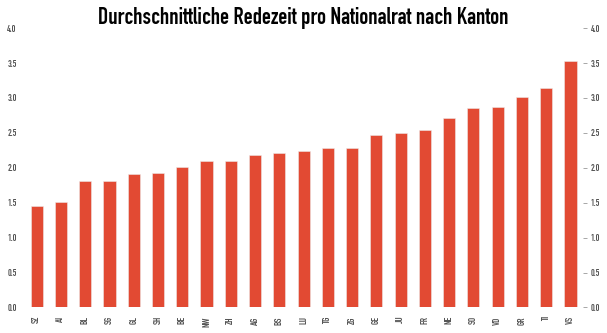

In [97]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
df.groupby('Kanton')['Rede Minuten'].mean().sort_values(ascending=True).plot(kind='bar')
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='on',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='on')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Durchschnittliche Redezeit pro Nationalrat nach Kanton", fontname='DIN Condensed', fontsize=24)
plt.savefig('1.pdf', transparent=True, bbox_inches='tight')

In [27]:
#lets try a scatter plot, marking Kantons from East to West, 1 - 26. First I need to create that file and import it. 

In [28]:
df_ostwest = pd.read_csv("reden_ostwest.csv")

In [29]:
df = df.merge(df_ostwest, left_on = 'Kanton', right_on ='Kanton') 

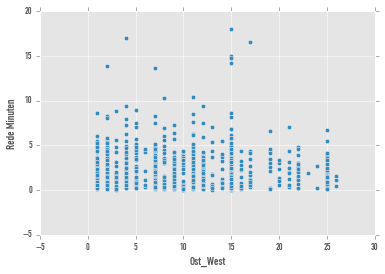

In [30]:
#UR is missing
df.plot(kind='scatter', x='Ost_West', y='Rede Minuten')

In [31]:
#No Correlation
df.corr()

,Reden_Länge,Rede Minuten,Ost_West
Reden_Länge,1.00000,1.00000,-0.09048
Rede Minuten,1.00000,1.00000,-0.09048
Ost_West,-0.09048,-0.09048,1.00000


# Looking into gender differences

In [32]:
#Preparing the dataframe for sex of NR
df_NR_extended = pd.read_csv("National- und Ständeräte - NR.csv")

In [33]:
#Meging the Dataframe
df = df.merge(df_NR_extended, left_on = 'Name', right_on ='Name') 

In [34]:
df.groupby('Geschlecht')['Rede Minuten'].mean()

Geschlecht
m    2.292039
w    2.317195
Name: Rede Minuten, dtype: float64

In [35]:
df.groupby('Sprache')['Rede Minuten'].mean()

Sprache
d    2.189559
f    2.664585
Name: Rede Minuten, dtype: float64

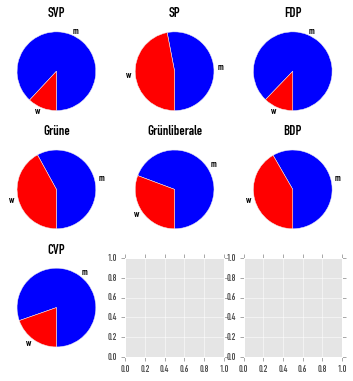

In [98]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(facecolor='White', nrows=3, ncols=3, figsize=(6,6))

df[df['Partei'] == 'V'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax1, kind='pie', startangle=270, colors=['b', 'r'])
ax1.set_title("SVP")
df[df['Partei'] == 'S'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax2, kind='pie', startangle=270, colors=['b', 'r'])
ax2.set_title("SP")
df[df['Partei'] == 'RL'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax3, kind='pie', startangle=270, colors=['b', 'r'])
ax3.set_title("FDP")
df[df['Partei'] == 'G'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax4, kind='pie', startangle=270, colors=['b', 'r'])
ax4.set_title("Grüne")
df[df['Partei'] == 'GL'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax5, kind='pie', startangle=270, colors=['b', 'r'])
ax5.set_title("Grünliberale")
df[df['Partei'] == 'BD'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax6, kind='pie', startangle=270, colors=['b', 'r'])
ax6.set_title("BDP")
df[df['Partei'] == 'C'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax7, kind='pie', startangle=270, colors=['b', 'r'])
ax7.set_title("CVP")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax7.set_ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#ax1.set_title("Anteil Redelängen, Männer vs. Frauen", fontname='DIN Condensed', fontsize=24)
#plt.tight_layout()
plt.savefig('2.pdf', transparent=True, bbox_inches='tight')

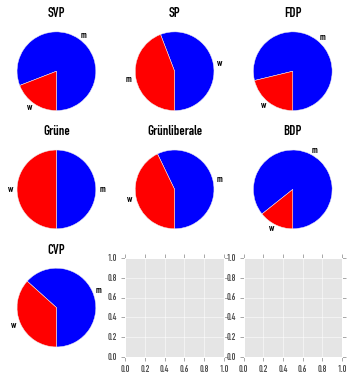

In [99]:
#Comparing that to actual size of woman votes.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(facecolor='White', nrows=3, ncols=3, figsize=(6,6))

df_NR_extended[df_NR_extended['Fraktion'] == 'V']['Geschlecht'].value_counts().plot(ax=ax1, kind='pie', startangle=270, colors=['b', 'r'])
ax1.set_title("SVP")
df_NR_extended[df_NR_extended['Fraktion'] == 'S']['Geschlecht'].value_counts().plot(ax=ax2, kind='pie', startangle=270, colors=['b', 'r'])
ax2.set_title("SP")
df_NR_extended[df_NR_extended['Fraktion'] == 'RL']['Geschlecht'].value_counts().plot(ax=ax3, kind='pie', startangle=270, colors=['b', 'r'])
ax3.set_title("FDP")
df_NR_extended[df_NR_extended['Fraktion'] == 'G']['Geschlecht'].value_counts().plot(ax=ax4, kind='pie', startangle=270, colors=['b', 'r'])
ax4.set_title("Grüne")
df_NR_extended[df_NR_extended['Fraktion'] == 'GL']['Geschlecht'].value_counts().plot(ax=ax5, kind='pie', startangle=270, colors=['b', 'r'])
ax5.set_title("Grünliberale")
df_NR_extended[df_NR_extended['Fraktion'] == 'BD']['Geschlecht'].value_counts().plot(ax=ax6, kind='pie', startangle=270, colors=['b', 'r'])
ax6.set_title("BDP")
df_NR_extended[df_NR_extended['Fraktion'] == 'C']['Geschlecht'].value_counts().plot(ax=ax7, kind='pie', startangle=270, colors=['b', 'r'])
ax7.set_title("CVP")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax7.set_ylabel('')
plt.savefig('3.pdf', transparent=True, bbox_inches='tight')

# The biggest Chatter Boxes

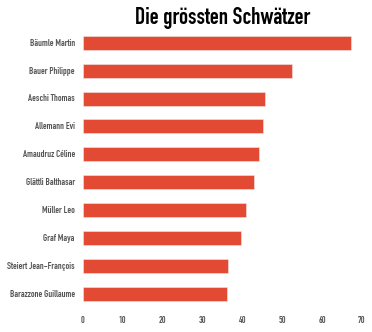

In [100]:
fig, ax = plt.subplots(figsize =(5,5), facecolor='White')

df.groupby('Name')['Rede Minuten'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', ax=ax)

ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='off')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Die grössten Schwätzer", fontname='DIN Condensed', fontsize=24)
plt.savefig('5.pdf', transparent=True, bbox_inches='tight')

# The Silent Ones

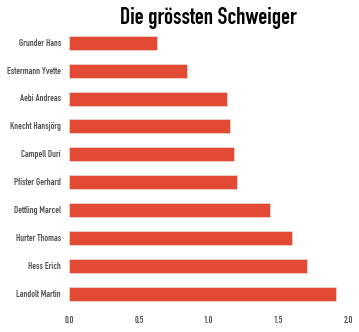

In [101]:
fig, ax = plt.subplots(figsize =(5,5), facecolor='White')

df.groupby('Name')['Rede Minuten'].sum().sort_values(ascending=False).tail(10).plot(kind='barh', ax=ax)
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='off')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Die grössten Schweiger", fontname='DIN Condensed', fontsize=24)
plt.savefig('6.pdf', transparent=True, bbox_inches='tight')

In [40]:
df_Text[df_Text['Name'] == 'Estermann Yvette']  

,Kanton,Name,Partei,Reden,Reden_Länge
377,LU,Estermann Yvette,V,": Geschätzte Frau Bundesrätin, vie len Dank f...",930


In [44]:
df_Text[df_Text['Name'] == 'Grunder Hans'].to_csv('grunder.csv', index=False)
df_Text[df_Text['Name'] == 'Estermann Yvette'].to_csv('estermann.csv', index=False)
df_Text[df_Text['Name'] == 'Campell Duri'].to_csv('campbell.csv', index=False)
df_Text[df_Text['Name'] == 'Hess Erich'].to_csv('hess.csv', index=False)
df_Text[df_Text['Name'] == 'Bäumle Martin'].to_csv('bäumle.csv', index=False)

In [42]:
df['Rede Minuten'].describe()

count    904.000000
mean       2.298857
std        2.140788
min        0.018182
25%        0.622500
50%        1.866364
75%        3.407273
max       17.974545
Name: Rede Minuten, dtype: float64

# Speech Length and Party

In [60]:
df_Skala = pd.read_csv("Skala4.csv")
df = df.merge(df_Skala, left_on = 'Partei', right_on ='Partei') 

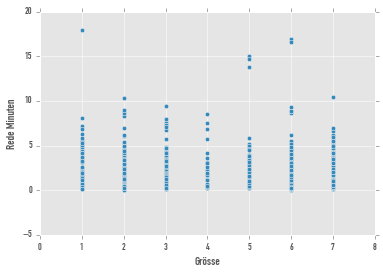

In [66]:
df.plot(kind='scatter', y='Rede Minuten', x='Grösse')

# Scatter Plot Sum of Talks and Party

In [1575]:
SUM = pd.DataFrame(df.groupby('Name')['Rede Minuten'].sum())
SUM.reset_index(inplace=True)
SUM = SUM.merge(df, left_on = 'Name', right_on ='Name') 

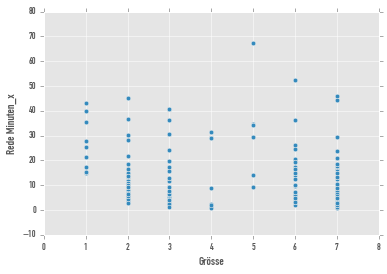

In [1580]:
SUM.plot(kind='scatter', x='Grösse', y='Rede Minuten_x')

In [103]:
df['Rede Minuten'].sum() / 60

34.63610606060606